<a href="https://colab.research.google.com/github/christophermalone/DSCI425/blob/main/CrossValidation_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-Validation in R

## Load tidyverse

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [2]:
#Load the tidyverse package
#Note:  tidyverse is automatically installed in Colab, the 
#        package just needs to be loaded with library()
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load the data

In [3]:
SaratogaNY_Homes <- read_csv("http://www.StatsClass.org/dsci425/Datasets/SaratogaNY_Homes.csv")


Rows: 1728 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (16): Price, Lot.Size, Waterfront, Age, Land.Value, New.Construct, Centr...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Making sure data was read in correctly...

In [4]:
#dim to get dimension of data.frame
dim(SaratogaNY_Homes)

#Look at first few rows
head(SaratogaNY_Homes)

[1] 1728   16

Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
132500,0.09,0,42,50000,0,0,3,4,2,906,35,2,1,1.0,5
181115,0.92,0,0,22300,0,0,2,3,2,1953,51,3,0,2.5,6
109000,0.19,0,133,7300,0,0,2,3,3,1944,51,4,1,1.0,8
155000,0.41,0,13,18700,0,0,2,2,2,1944,51,3,1,1.5,5
86060,0.11,0,0,15000,1,1,2,2,3,840,51,2,0,1.0,3
120000,0.68,0,31,14000,0,0,2,2,2,1152,22,4,1,1.0,8


Checking the data types

In [5]:
str(SaratogaNY_Homes)

spec_tbl_df [1,728 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Price        : num [1:1728] 132500 181115 109000 155000 86060 ...
 $ Lot.Size     : num [1:1728] 0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ Waterfront   : num [1:1728] 0 0 0 0 0 0 0 0 0 0 ...
 $ Age          : num [1:1728] 42 0 133 13 0 31 33 23 36 4 ...
 $ Land.Value   : num [1:1728] 50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ New.Construct: num [1:1728] 0 0 0 0 1 0 0 0 0 0 ...
 $ Central.Air  : num [1:1728] 0 0 0 0 1 0 0 0 0 0 ...
 $ Fuel.Type    : num [1:1728] 3 2 2 2 2 2 4 4 3 2 ...
 $ Heat.Type    : num [1:1728] 4 3 3 2 2 2 3 2 4 2 ...
 $ Sewer.Type   : num [1:1728] 2 2 3 2 3 2 2 2 2 1 ...
 $ Living.Area  : num [1:1728] 906 1953 1944 1944 840 ...
 $ Pct.College  : num [1:1728] 35 51 51 51 51 22 51 35 51 44 ...
 $ Bedrooms     : num [1:1728] 2 3 4 3 2 4 4 4 3 3 ...
 $ Fireplaces   : num [1:1728] 1 0 1 1 0 1 1 1 0 0 ...
 $ Bathrooms    : num [1:1728] 1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5

The following code will specify a factor data type: Waterfront, New.Construct, Central.Air, Fuel.Type, Head.Type, and Sewer.Type.

In [6]:
#Create a data.frame for modeling
SaratogaNY_Homes_Model <- SaratogaNY_Homes

#Make Waterfront a factor variable
SaratogaNY_Homes_Model$Waterfront <- as.factor(SaratogaNY_Homes_Model$Waterfront)

#Make New.Construct a factor variable
SaratogaNY_Homes_Model$New.Construct <- as.factor(SaratogaNY_Homes_Model$New.Construct)

#Make Central.Air a factor variable
SaratogaNY_Homes_Model$Central.Air <- as.factor(SaratogaNY_Homes_Model$Central.Air)

#Make Fuel.Type a factor variable
SaratogaNY_Homes_Model$Fuel.Type <- as.factor(SaratogaNY_Homes_Model$Fuel.Type)

#Make Heat.Type a factor variable
SaratogaNY_Homes_Model$Heat.Type <- as.factor(SaratogaNY_Homes_Model$Heat.Type)

#Make Sewer.Type a factor variable
SaratogaNY_Homes_Model$Sewer.Type <- as.factor(SaratogaNY_Homes_Model$Sewer.Type)

Verify that the data types are correct...

In [7]:
str(SaratogaNY_Homes_Model)

spec_tbl_df [1,728 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Price        : num [1:1728] 132500 181115 109000 155000 86060 ...
 $ Lot.Size     : num [1:1728] 0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ Waterfront   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age          : num [1:1728] 42 0 133 13 0 31 33 23 36 4 ...
 $ Land.Value   : num [1:1728] 50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ New.Construct: Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ Central.Air  : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ Fuel.Type    : Factor w/ 3 levels "2","3","4": 2 1 1 1 1 1 3 3 2 1 ...
 $ Heat.Type    : Factor w/ 3 levels "2","3","4": 3 2 2 1 1 1 2 1 3 1 ...
 $ Sewer.Type   : Factor w/ 3 levels "1","2","3": 2 2 3 2 3 2 2 2 2 1 ...
 $ Living.Area  : num [1:1728] 906 1953 1944 1944 840 ...
 $ Pct.College  : num [1:1728] 35 51 51 51 51 22 51 35 51 44 ...
 $ Bedrooms     : num [1:1728] 2 3 4 3 2 4 4 4 3 3 ...
 $ Fireplaces  

## Fitting an initial model

In [8]:
initial.lm <- lm(Price ~ ., data=SaratogaNY_Homes_Model) 

Getting the summaries for the initial model.

In [9]:
summary(initial.lm)


Call:
lm(formula = Price ~ ., data = SaratogaNY_Homes_Model)

Residuals:
    Min      1Q  Median      3Q     Max 
-228655  -35225   -4929   27480  457325 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.027e+04  1.971e+04   1.029 0.303794    
Lot.Size        7.599e+03  2.241e+03   3.391 0.000713 ***
Waterfront1     1.202e+05  1.554e+04   7.734 1.77e-14 ***
Age            -1.304e+02  5.839e+01  -2.234 0.025600 *  
Land.Value      9.219e-01  4.757e-02  19.379  < 2e-16 ***
New.Construct1 -4.544e+04  7.308e+03  -6.219 6.29e-10 ***
Central.Air1    9.953e+03  3.478e+03   2.862 0.004266 ** 
Fuel.Type3     -1.093e+04  1.213e+04  -0.901 0.367799    
Fuel.Type4     -4.381e+03  5.015e+03  -0.874 0.382466    
Heat.Type3     -1.045e+04  4.190e+03  -2.495 0.012679 *  
Heat.Type4     -8.245e+01  1.232e+04  -0.007 0.994661    
Sewer.Type2     4.845e+03  1.712e+04   0.283 0.777239    
Sewer.Type3     3.321e+03  1.707e+04   0.195 0.845734    
Living.Area     6

## Getting a better model using model selection (backwards)

In [11]:
stepwise.lm <- step(initial.lm)

Start:  AIC=37940.29
Price ~ Lot.Size + Waterfront + Age + Land.Value + New.Construct + 
    Central.Air + Fuel.Type + Heat.Type + Sewer.Type + Living.Area + 
    Pct.College + Bedrooms + Fireplaces + Bathrooms + Rooms

                Df  Sum of Sq        RSS   AIC
- Sewer.Type     2 7.7186e+08 5.8010e+12 37937
- Fuel.Type      2 5.0768e+09 5.8053e+12 37938
- Fireplaces     1 4.0907e+08 5.8006e+12 37938
- Pct.College    1 1.7953e+09 5.8020e+12 37939
<none>                        5.8002e+12 37940
- Heat.Type      2 2.1166e+10 5.8214e+12 37943
- Age            1 1.6941e+10 5.8172e+12 37943
- Central.Air    1 2.7792e+10 5.8280e+12 37947
- Bedrooms       1 3.1611e+10 5.8318e+12 37948
- Rooms          1 3.3449e+10 5.8337e+12 37948
- Lot.Size       1 3.9024e+10 5.8392e+12 37950
- New.Construct  1 1.3125e+11 5.9315e+12 37977
- Bathrooms      1 1.5967e+11 5.9599e+12 37985
- Waterfront     1 2.0301e+11 6.0032e+12 37998
- Living.Area    1 7.7987e+11 6.5801e+12 38156
- Land.Value     1 1.2746e+1

Getting summaries for model after doing stepwise model selection via backwards selection.

In [12]:
summary(stepwise.lm)


Call:
lm(formula = Price ~ Lot.Size + Waterfront + Age + Land.Value + 
    New.Construct + Central.Air + Heat.Type + Living.Area + Bedrooms + 
    Bathrooms + Rooms, data = SaratogaNY_Homes_Model)

Residuals:
    Min      1Q  Median      3Q     Max 
-228689  -35047   -4366   27532  457008 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.751e+04  6.977e+03   2.510 0.012169 *  
Lot.Size        7.409e+03  2.044e+03   3.624 0.000299 ***
Waterfront1     1.204e+05  1.533e+04   7.855 6.97e-15 ***
Age            -1.394e+02  5.703e+01  -2.444 0.014609 *  
Land.Value      9.183e-01  4.621e-02  19.873  < 2e-16 ***
New.Construct1 -4.450e+04  7.141e+03  -6.232 5.79e-10 ***
Central.Air1    9.652e+03  3.393e+03   2.845 0.004501 ** 
Heat.Type3     -1.055e+04  4.162e+03  -2.535 0.011348 *  
Heat.Type4     -9.976e+03  4.037e+03  -2.471 0.013577 *  
Living.Area     7.012e+01  4.499e+00  15.586  < 2e-16 ***
Bedrooms       -7.749e+03  2.551e+03  -3.038 0.002419 *

## Creating some basic plots of the model after model selection.

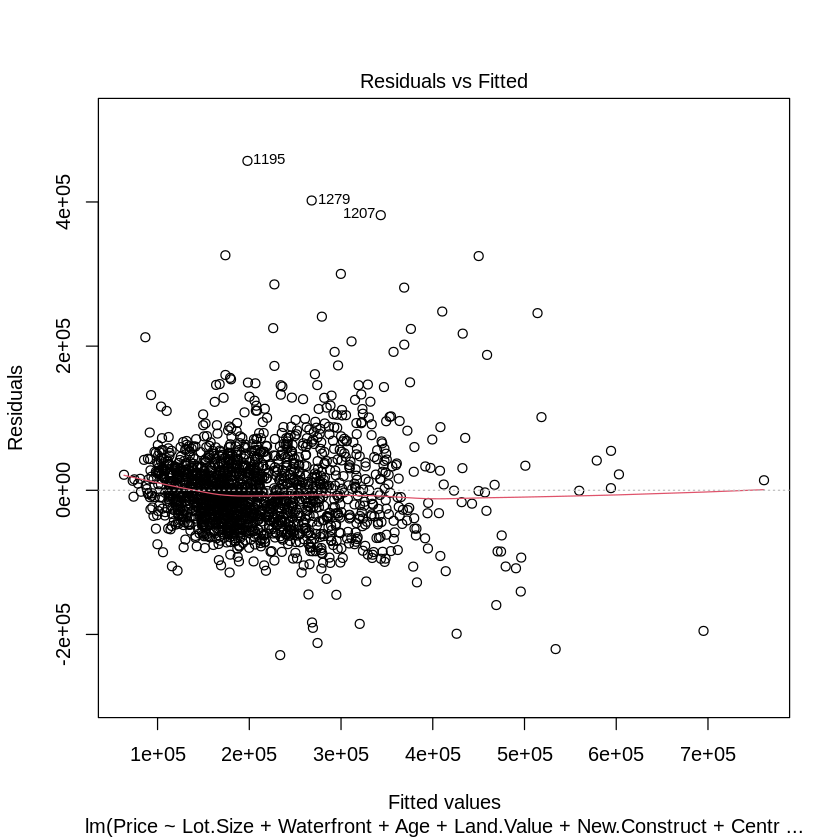

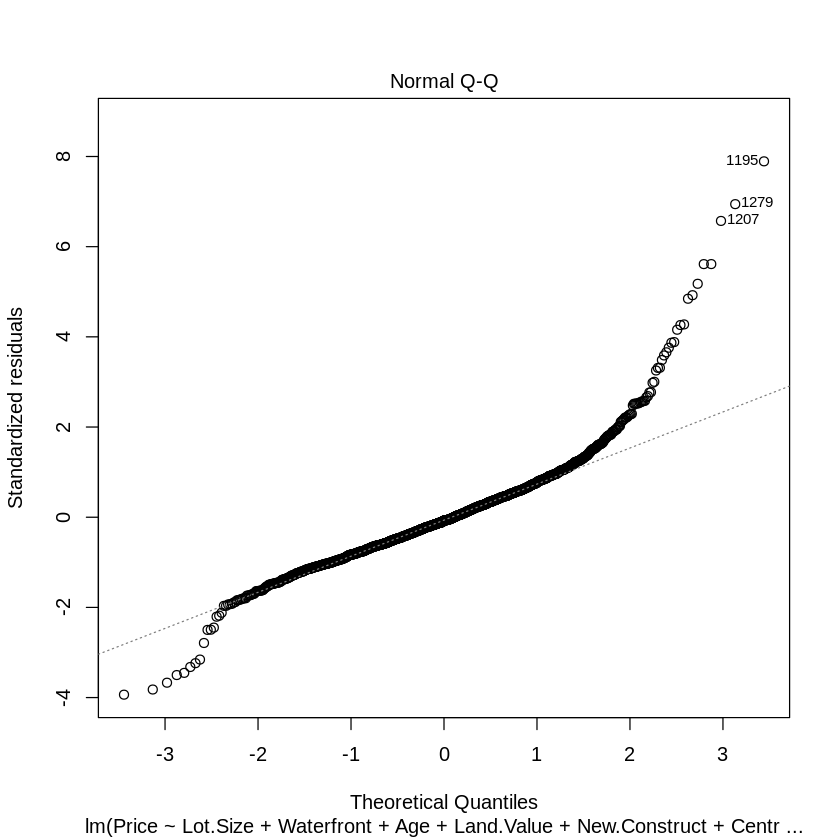

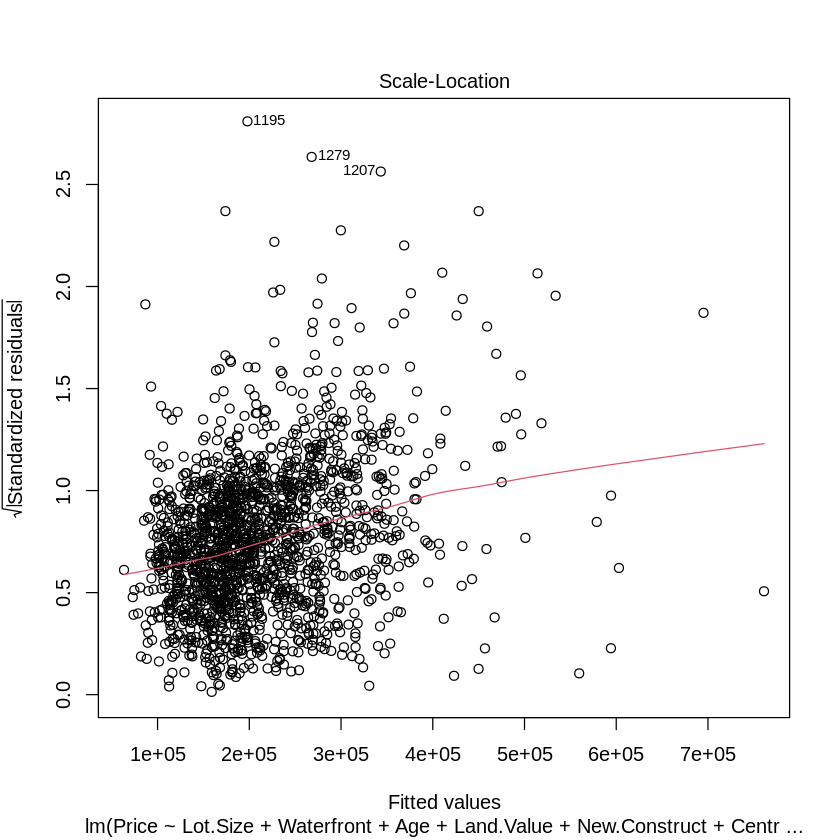

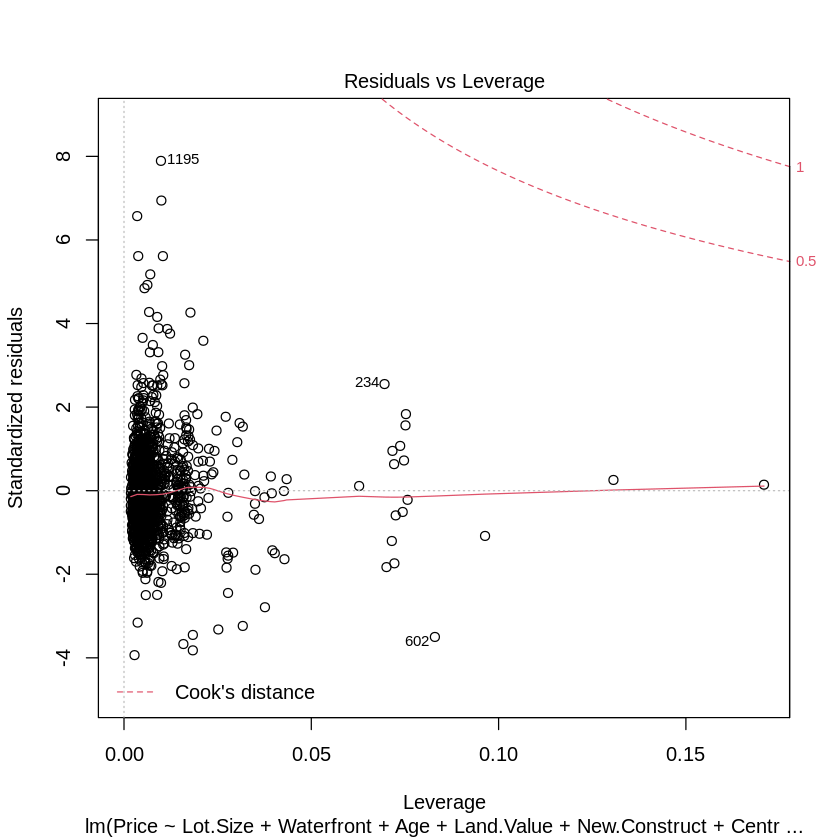

In [13]:
plot(stepwise.lm)

## Plot of Actual vs Predicted

The following code can be used to create a plot of Actual vs Predicted.

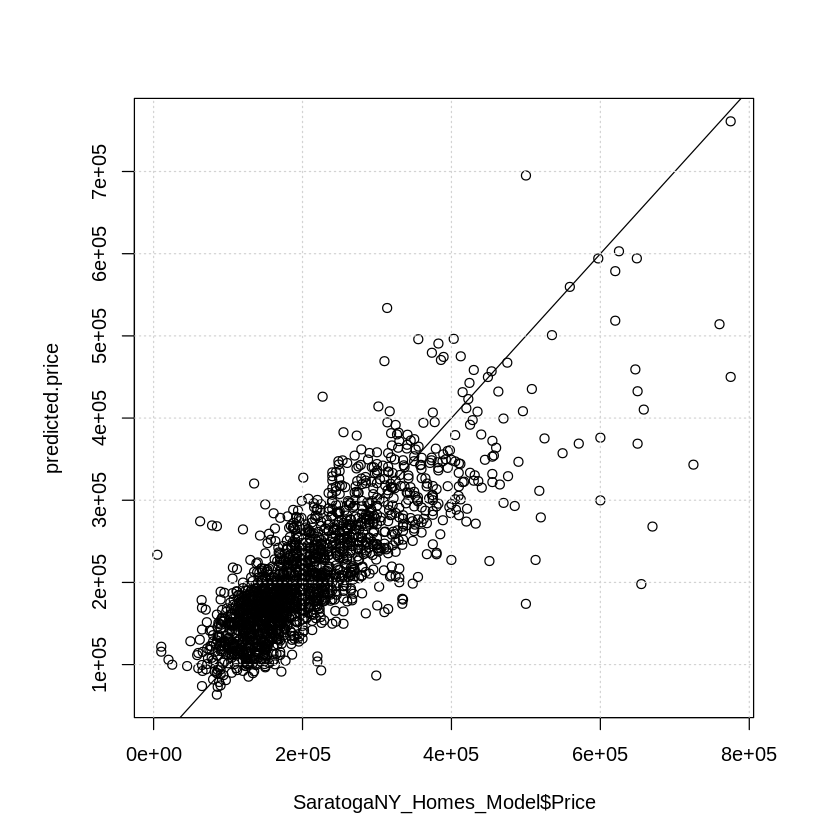

In [14]:
par(pty="s")
predicted.price <- predict(stepwise.lm, newdata = SaratogaNY_Homes_Model)
plot(SaratogaNY_Homes_Model$Price,predicted.price)
abline(0,1)
grid()
par(pty="m")

Computing the $R^2$ value for the plot above.

In [15]:
#First, getting the predicted values
predicted.price <- predict(stepwise.lm, newdata = SaratogaNY_Homes_Model)

#Next, computing the R^2 value and printing this value to the screen.
RSquared <- (sum((SaratogaNY_Homes_Model$Price - mean(SaratogaNY_Homes_Model$Price))^2) - sum((SaratogaNY_Homes_Model$Price-predicted.price)^2 )) / sum((SaratogaNY_Homes_Model$Price - mean(SaratogaNY_Homes_Model$Price))^2)
paste("RSquared value is ",round(RSquared,4))

[1] "RSquared value is  0.653"

The common measures of error for prediction.


*   Root Mean Square Error, $RMSEP = \sqrt{ \frac{ \sum{ (y-\hat{y} )^2}}{n}}$
*   Mean Absolute Error, $MAE = \frac{ \sum{ |y-\hat{y} |}}{n} $ 
*   Mean Absolute Percent Error, $MAPE = \frac{ \sum{ |\frac{y-\hat{y}}{y} |}}{n}*100 $





The following function will compute each of these prediction error measures.

In [16]:
PredictionAccuracy = function(y,ypred){
    RMSEP = sqrt(mean((y-ypred)^2))
    MAE = mean(abs(y-ypred))
    MAPE = mean(abs(y-ypred)/y)*100
    return(data.frame(RMSEP=RMSEP,MAE=MAE,MAPE=MAPE))
}

Using the PredictionAccuracy() function

In [17]:
PredictionAccuracy(SaratogaNY_Homes_Model$Price, predicted.price)

RMSEP,MAE,MAPE
<dbl>,<dbl>,<dbl>
57972.24,41118.79,25.36534


# Using the caret package for cross-validation

In [23]:
#Install the caret package
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Next, load the caret package into the current Colab session.

In [24]:
#load the caret package
library(caret)

## Caret Cross-Validation: Split-Sample (with Replacement)

In [67]:
#Using the caret package to conduct a split-sample cross validation
#The cross-validation settings are set with the trainControl() function.

#Here, the boot (bootstrap) is being specifed with p=75% and only 1 split-sample will be conducted
SS_cv_settings <- trainControl(method = "boot", p=0.75, number=1)


#Running the split-sample cross-validation routine for a linear model object
SS_cv_output <- train(formula(stepwise.lm),             # formula of model to cross-validate
                      data = SaratogaNY_Homes_Model,     # data used for the fit     
                      trControl = SS_cv_settings,        # settings for cross-validation
                      method="lm"                        # use linear model method for fitting
                     )

#Print the output
SS_cv_output  

Linear Regression 

1728 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (1 reps) 
Summary of sample sizes: 1728 
Resampling results:

  RMSE      Rsquared   MAE     
  64956.45  0.5683016  44837.75

Tuning parameter 'intercept' was held constant at a value of TRUE

## Caret Cross-Validation: $k-Fold$

In [36]:
#Using the caret package to conduct a k-fold cross validation
#The cross-validation settings are set with the trainControl() function.

#Here, the cv method is being specifed for K-Fold and the number of folds is 10
kFold_cv_settings <- trainControl(method = "cv", number=10)

#Running the k-Fold cross-validation routine for a linear model object
kFold_cv_output <- train(formula(stepwise.lm),               # formula of model to cross-validate
                         data = SaratogaNY_Homes_Model,      # data used for the fit     
                         trControl = kFold_cv_settings,      # settings for cross-validation
                         method = "lm",                      # use linear model method for fitting
                    )

#Print the k-fold cross-validation output
kFold_cv_output  

Linear Regression 

1728 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1555, 1556, 1555, 1556, 1555, 1555, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  58497.09  0.6479251  41461.18

Tuning parameter 'intercept' was held constant at a value of TRUE

The $resample object can be used to see the model performace for each of the k-folds.

In [39]:
#Getting the error summaries for each fold
kFold_cv_output$resample

RMSE,Rsquared,MAE,Resample
<dbl>,<dbl>,<dbl>,<chr>
54306.05,0.7169965,37637.58,Fold01
56667.72,0.6151467,42054.18,Fold02
61223.76,0.7061993,43106.75,Fold03
58576.55,0.6256796,40452.03,Fold04
57967.66,0.6671526,41454.35,Fold05
59347.11,0.5819533,41133.86,Fold06
61568.93,0.5821032,43556.79,Fold07
52141.99,0.6641426,39990.57,Fold08
57983.65,0.6915137,41693.98,Fold09


## Caret Cross-Validation: Leave-One-Out

In [40]:
#Using the caret package to conduct the leave-one-out cross validation
#The cross-validation settings are set with the trainControl() function.

#Here, the leave-one-out cross validation (LOOCV) is being specifed
Loo_cv_settings <- trainControl(method = "LOOCV")

#Next, use the train() function to conduct the cross-validation procedure for this data/model
LOO_cv_output <- train(formula(stepwise.lm),               # formula of model to cross-validate
                       data = SaratogaNY_Homes_Model,      # data used for the fit   
                       trControl = Loo_cv_settings,        # settings for cross-validation
                       method = "lm",                      # use linear model method for fitting
                    )

#Print the output from the Leave-one-out algorithm
LOO_cv_output

Linear Regression 

1728 samples
  11 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1727, 1727, 1727, 1727, 1727, 1727, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  58560.93  0.6459372  41480.44

Tuning parameter 'intercept' was held constant at a value of TRUE

## Caret Cross-Validation: 0.632 Bootstrap

In [48]:
#Using the caret package to conduct a split-sample cross validation
#The cross-validation settings are set with the trainControl() function.

#Here, the boot (bootstrap) is being specifed with p=63.2% 
Boot632_cv_settings <- trainControl(method = "boot632")


#Running the split-sample cross-validation routine for a linear model object
Boot632_cv_output <- train(formula(stepwise.lm),                 # formula of model to cross-validate
                      data = SaratogaNY_Homes_Model,           # data used for the fit     
                      trControl = Boot632_cv_settings,        # settings for cross-validation
                      method="lm"                             # use linear model method for fitting
                     )

#Print the output
Boot632_cv_output 

Linear Regression 

1728 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1728, 1728, 1728, 1728, 1728, 1728, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  58598.37  0.6460718  41412.99

Tuning parameter 'intercept' was held constant at a value of TRUE

## Caret Cross-Validation: 0.632 Bootstrap with Optimism

In [49]:
#Using the caret package to conduct a split-sample cross validation
#The cross-validation settings are set with the trainControl() function.

#Here, the optimism boot (bootstrap) is being specifed 
OptimismBoot_cv_settings <- trainControl(method = "optimism_boot")


#Running the split-sample cross-validation routine for a linear model object
OptimismBoot_cv_output <- train(formula(stepwise.lm),                 # formula of model to cross-validate
                      data = SaratogaNY_Homes_Model,        # data used for the fit     
                      trControl = OptimismBoot_cv_settings,        # settings for cross-validation
                      method="lm"                           # use linear model method for fitting
                     )

#Print the output
OptimismBoot_cv_output 

Linear Regression 

1728 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1728, 1728, 1728, 1728, 1728, 1728, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  58983.17  0.6493299  41713.78

Tuning parameter 'intercept' was held constant at a value of TRUE

## Caret Cross-Validation: Monte Carlo 

The following specification for the trainControl() function will conduct a split-sample with 75% / 35% split; The split-sample process will be repeated a total of 100 times. 

In [50]:
#Using the caret package to conduct a split-sample cross validation
#The cross-validation settings are set with the trainControl() function.

#Here, the boot (bootstrap) is being specifed with p=75% with 100 split-sample repetitions
SS100_cv_settings <- trainControl(method = "boot", p=0.75, number=100)


#Running the split-sample cross-validation routine for a linear model object
SS100_cv_output <- train(formula(stepwise.lm),             # formula of model to cross-validate
                      data = SaratogaNY_Homes_Model,     # data used for the fit     
                      trControl = SS100_cv_settings,        # settings for cross-validation
                      method="lm"                        # use linear model method for fitting
                     )

#Print the output
SS100_cv_output  

Linear Regression 

1728 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (100 reps) 
Summary of sample sizes: 1728, 1728, 1728, 1728, 1728, 1728, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  58774.38  0.6481079  41793.96

Tuning parameter 'intercept' was held constant at a value of TRUE

Again, the resample object will allow one to see the model performance for each iteration of the split-sample cross-validation.

In [64]:
head(SS100_cv_output$resample)

,RMSE,Rsquared,MAE,Resample
,<dbl>,<dbl>,<dbl>,<chr>
1,55271.53,0.6654802,40025.67,Resample001
2,59102.53,0.6379373,42030.06,Resample002
3,57252.52,0.6780083,41430.47,Resample003
4,57003.89,0.6762966,41476.12,Resample004
5,58864.49,0.6518290,40722.25,Resample005
6,60067.96,0.6593123,41492.97,Resample006


Getting the summaries for the RMSE across the 100 repetitions for Split-Sample.

[1] "RMSE Summary from Split-Sample with 100 Repetitions"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  51687   57024   58932   58774   60724   66510 

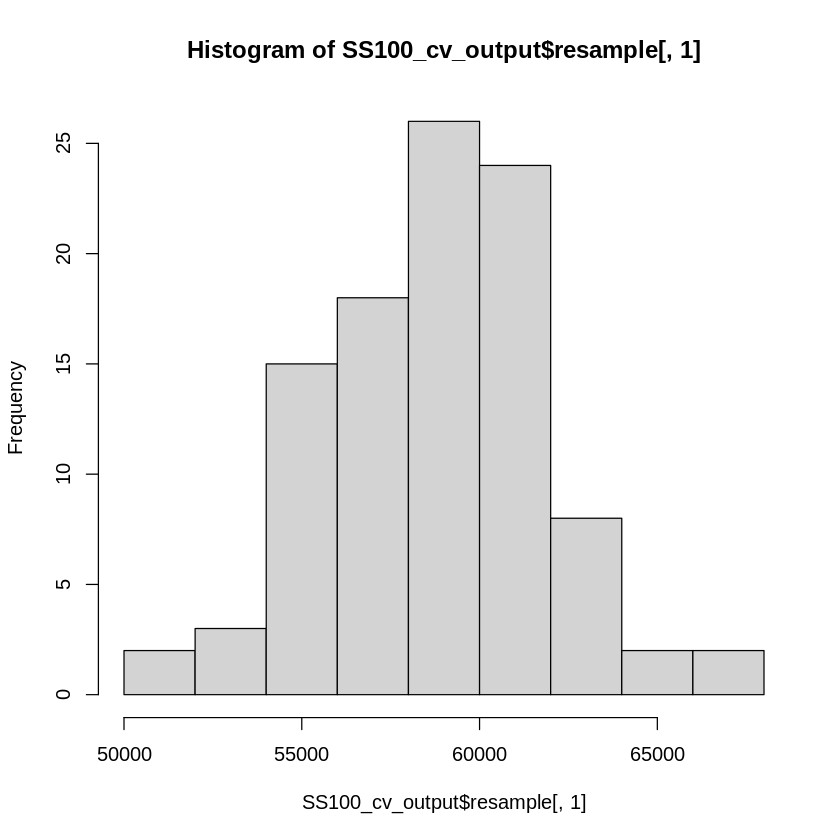

In [60]:
paste("RMSE Summary from Split-Sample with 100 Repetitions")
summary(SS100_cv_output$resample[,1])
hist(SS100_cv_output$resample[,1])

In [62]:
#Using the caret package to conduct a repeated k-fold cross validation 

#Here, the cv method is being specifed for K-Fold, the number of folds is 10, with 100 repeated iterations
kFold100_cv_settings <- trainControl(method = "repeatedcv", number=10, repeats=100)

#Running the k-Fold cross-validation routine for a linear model object
kFold00_cv_output <- train(formula(stepwise.lm),               # formula of model to cross-validate
                         data = SaratogaNY_Homes_Model,      # data used for the fit     
                         trControl = kFold100_cv_settings,      # settings for cross-validation
                         method = "lm",                      # use linear model method for fitting
                    )

#Print the k-fold cross-validation output
kFold00_cv_output 

Linear Regression 

1728 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 100 times) 
Summary of sample sizes: 1556, 1555, 1555, 1555, 1555, 1555, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  58265.39  0.6500425  41492.09

Tuning parameter 'intercept' was held constant at a value of TRUE

Getting the summaries for the RMSE across the 100 repetitions for k-Fold.

[1] "RMSE Summary from k-Fold with 100 Repetitions"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  43228   53880   57553   58265   62088   79512 

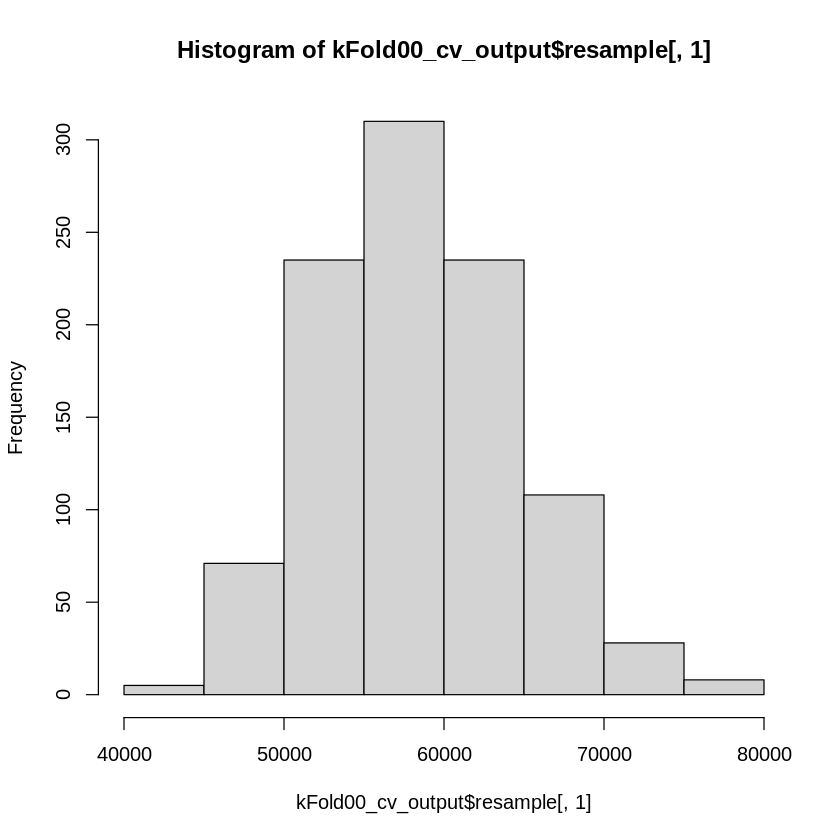

In [63]:
paste("RMSE Summary from k-Fold with 100 Repetitions")
summary(kFold00_cv_output$resample[,1])
hist(kFold00_cv_output$resample[,1])



---



---

End of Document